# Gene-expression clustering
<p>By: Oren<br>
Faculty of natural science<br>
Biology department<br>
Háskóli Íslands - University of Iceland</p>

<h3>Preface</h3>
<p>In this notebook, written in Python, I will examine the clustering of gene-expression of charr in the lake of Þingvallavatn, Iceland. The clustering only consider numerical features and not biological considerations. The purpose is to check whether machine learning algorithms can verify that the decision of dividing into 10 clusters was good or perhaps there was a better way of clustering.</p>

<h3>About the data</h3>
<p>
This is not the main article of the research, so I won't dive deep into details.<br>
Basically there are 8 columns in the database, each column represents a species. The mother and father of the fish are represented by two letters (SB,PL). The number represent the stage of development of the individual fish. There are two species of mothers, two of fathers and two stages of development, hence 8 types
</p>

### importing usefull libraries
Note: When Running for the first time on a new machine you would require to install some of the packages

In [ ]:
# install scikit-learn-extra for using KMedoids clustering
## with conda:
#conda install -c conda-forge scikit-learn-extra
## with pip:
!pip install scikit-learn-extra

## <span style="color:darkblue">The code starts here</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_samples, silhouette_score # for evaluation

## Step 1: Read the data using Pandas library
Then remove rows containing NaN values and fit the data for proccessing

In [2]:
data = pd.read_csv("database\\genes\\gene_noise_github500_all_genes.csv",index_col=0)

data.dropna(inplace=True) # remove NaN

scaler = StandardScaler().fit(data)
x_scaled = scaler.transform(data)

## Step 2: Run K-Medoids for clustering into 10 clusters and calculate average Silhouette value

In [3]:
kMedoids = KMedoids(n_clusters = 10, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.24383962715035937


### Print the Silhouette value for each cluster

In [24]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
x = 1
for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(f'Cluster {x}\tmean: {np.mean(ith_cluster_silhouette_values)}',sep="", end="\t")
    print(f'median: {np.median(ith_cluster_silhouette_values)}')
    x += 1

Cluster 1	mean: 0.12538178920052329	median: 0.11956884754583097
Cluster 2	mean: 0.1902724875808576	median: 0.1852317392761481
Cluster 3	mean: 0.1574720073371158	median: 0.16140118520924043
Cluster 4	mean: 0.1510168965040338	median: 0.1656686051296039
Cluster 5	mean: 0.5741269874415056	median: 0.6506986801445156
Cluster 6	mean: 0.1824705078808431	median: 0.1924357459787296
Cluster 7	mean: 0.15743986065961038	median: 0.14839933547420786
Cluster 8	mean: 0.3939315060793435	median: 0.4344792655905823
Cluster 9	mean: 0.1373619984585172	median: 0.12770959891741865
Cluster 10	mean: 0.18190816572542245	median: 0.16999034540572433


## Step 3: Use Silhouette Width to find an ideal number of clusters
Using the default distancing method, Euclidean.It is the same method that ComplexHeatMap in R was using.<br>
Clustering into 2 to 14 clusters may take a while to compute

In [7]:
import os

swALT = []
path = "database/genes/Clusters"
for i in range(25,27):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    name = f'{i}_clusters_euclidean_kmedoids_alternate.csv'
    os.path.join(path,name)
    data.assign(cluster = [i+1 for i in kMedoids.labels_]).to_csv(path_or_buf=os.path.join(path,name)) # save the clustered data
    
    swALT.append(silhouette_avg)

#### print the average Silhouette for each clustering:

In [8]:
i = 2
for x in swALT:
    print(f'{i}: {x}')
    i += 1

2: 0.45347765268896356
3: 0.3601973149279102
4: 0.2969030735722858
5: 0.2989508156197584
6: 0.2644224543065368
7: 0.2547564195177848
8: 0.2587300351669917
9: 0.24462337154819017
10: 0.24383962715035937
11: 0.2571652679385176
12: 0.24676924358895286
13: 0.22565489333761732
14: 0.218066295396448
15: 0.21548548051805913
16: 0.21368506438782633
17: 0.21432268347574557
18: 0.20792353448610332
19: 0.1945038922574623
20: 0.19510915091111714
21: 0.217617164550077
22: 0.21949310878357337
23: 0.2166563779447613
24: 0.21618120372768626
25: 0.21558801431220886
26: 0.20840480512916923


#### Plot it on a graph for a better visualisation 

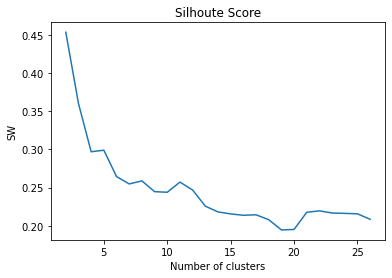

In [10]:
plt.plot(range(2, 27), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')
plt.show()

<p style="color:blue;font-size:1.1em">Trying different method</p>
When the KMedoids was called with 'PAM' method, the computations were, as expected, significantly slower, therefore I would only include the results here (I ran it on Google Colab). It is interesting to see it's plot and compare it, PAM sometimes yields better clustering.
More information about PAM can be found <a href="https://www.datanovia.com/en/lessons/k-medoids-in-r-algorithm-and-practical-examples/">here</a>

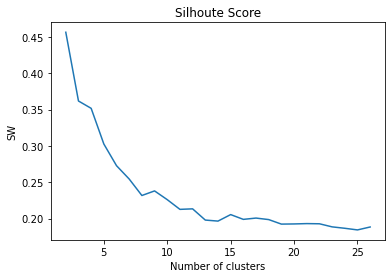

In [10]:
swPAM = []
KM = {}
path = "database/genes/Clusters"
for i in range(2,27):
    kMedoids = KMedoids(n_clusters = i, random_state = 0,method="pam")
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    name = f'{i}_clusters_euclidean_kmedoids_pam.csv'
    os.path.join(path,name)
    data.assign(cluster = [i+1 for i in kMedoids.labels_]).to_csv(path_or_buf=os.path.join(path,name)) # save the clustered data
    KM[i] = kMedoids # to keep the model in case I need it later
    swPAM.append(silhouette_avg)
plt.plot(range(2, 27), swPAM)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')
plt.show()

## Step 4: Trying with different distance measuements
Documentation of the KMedoids algorhitm can be found [here](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html)


In [ ]:
sw=[]
metric = ['manhattan', 'cosine', 'hamming', 'euclidean', 'cityblock', 'braycurtis', 'canberra', 'chebyshev']
j = 0
for met in metric:
    sw1 = []
    for i in range(10, 12): # (this means 10 and 11 clusters)
        kMedoids = KMedoids(n_clusters=i, metric=met,max_iter=200, random_state=None)
        kMedoids.fit(x_scaled)
        y_kmed = kMedoids.fit_predict(x_scaled)
        silhouette_avg = silhouette_score(x_scaled, y_kmed)
        sw1.append(silhouette_avg)
    sw.append(sw1)

<pre>Don't run the chunk above, It takes too long time the values were as following:
The values printed by manhattan, cosine, hamming distanceing methods for 10 and 11 clusters:
                  10                     11           
manhattan    0.2367677377013484     0.21803190938685588
cosine       0.1715647236389263     0.19670459070111415
hamming      0.010226965911435758   0.008906462294352156
euclidean:   0.24383962715035937    0.2571652679385176 
cityblock    0.2367677377013484     0.21803190938685588 
braycurtis   0.2033415097624221     0.2094412413146236 
canberra     0.18569086840970572    0.17764437935200109 
chebyshev    0.19039169676930606    0.1794352090240408 

On Google Colab I ran 4 distancing measures for 9,10,11 and 12 clusters, using PAM method (much slower but usually more accurate) and here are results 
manhattan    0.1930692399351299     0.20381456367545348    0.19948449137600396    0.19229694220462515]
cosine       0.22270343762058528    0.2069126994983051     0.18788972233787182    0.19616430413329503]
hamming     -0.34392190880457985   -0.34212262154400014   -0.3176884287193999    -0.358024055738379]
minkowski    0.2380961046950287     0.22607786954257775    0.21273685061178071    0.21343562442568942]
</pre>

In case you ran the chunk above, you can print the results by running this one:

In [ ]:
i = 0
for row in sw:
    print(f'{metric[i]}: {row}')
    i+=1

 backup for swPAM in case of system restart
swPAM = [0.4562552929616901, 0.3617245972390347, 0.3516318212568457, 0.3025924783816126,
 0.27277604305561626, 0.25441969522818736, 0.23178661955733199, 0.2380961046950287,
 0.22607786954257775, 0.21273685061178071, 0.21343562442568942, 0.19801290340483652,
 0.1965994828314399, 0.20554204615235028, 0.1989729628631952, 0.20075872693627533,
 0.19867929049936503, 0.1924675850448171, 0.19268880731393656, 0.19315491467369483,
 0.1929073425294748, 0.18866887759384862, 0.18672232845319106, 0.18447343724602036,
 0.18850397569058588]

## Results for K-Medoids
<p style="font-size:1.2em">
The results we got by the computations above do not provide us enough confidence to declare the best number of clusters. It seems, however that the Euclidean distance worked better than others, followed by cosine distance. By 'alter' algorithm (the default one when calling KMedoids) it looks like 11 clusters would be a better choice than 10 by this algorithm, the 'PAM' which is considered to be more accurate shows us that 9 clusters are better than 10 which is better than 11. The differences, however, aren't significant enough to determine whether it is indeed better, biological considerations should be  involved to decide on that.
</p>
<p>The reason I wanted at first to use K-Medoids is because it is sometimes relevant algorithm for using in biology, however, like everything in biology, nothing can have a straight forward approach or a formula. Therefore it is good to check other directions.</p>

## BIRCH, hierarchical clustering 

In [15]:
from sklearn.cluster import Birch
path = "database/genes/Clusters/birch"

swBIRCH = []
brc = Birch(n_clusters=None)
brc.fit(x_scaled)
brc.partial_fit(x_scaled)
for i in range(2,27):
    name = f'{i}_clusters_birch.csv'
    brc.set_params(n_clusters=i)
    brc.partial_fit()
    x = brc.predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, x)
    data.assign(cluster = [i+1 for i in x]).to_csv(path_or_buf=os.path.join(path,name)) # save the clustered data
    swBIRCH.append(silhouette_avg)

## k-Means

In [20]:
from sklearn.cluster import KMeans
import os
path = "database/genes/Clusters"
sw_Kmeans = []
labels = []
for i in range(2,27):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_scaled)
    kmeans.fit(x_scaled)
    y_kmed = kmeans.predict(x_scaled) 
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw_Kmeans.append(silhouette_avg)
    labels.append([kmeans.labels_])
    name = f'{i}_clusters_kmeans.csv'
    data.assign(cluster = [i+1 for i in kmeans.labels_]).to_csv(path_or_buf=os.path.join(path,name)) # save the clustered data

Let's plot everything we got so far on one Silhoute score graph, for a visual comarison

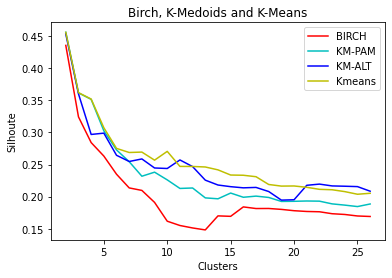

In [22]:
plt.plot(range(2,27), swBIRCH, color='r', label='BIRCH')
plt.plot(range(2,27), swPAM, color='c', label='KM-PAM')
plt.plot(range(2,27), swALT, color='b', label='KM-ALT')
plt.plot(range(2,27), sw_Kmeans, color='y', label='Kmeans')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Clusters")
plt.ylabel("Silhoute")
plt.title("Birch, K-Medoids and K-Means")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

We see that choosing ideal number of clusters is not very obvious, the data points aren't distinct enough. We can visualize it better by projecting all the 8 dimensions into a 2 dimensional plot, using TSNE. Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

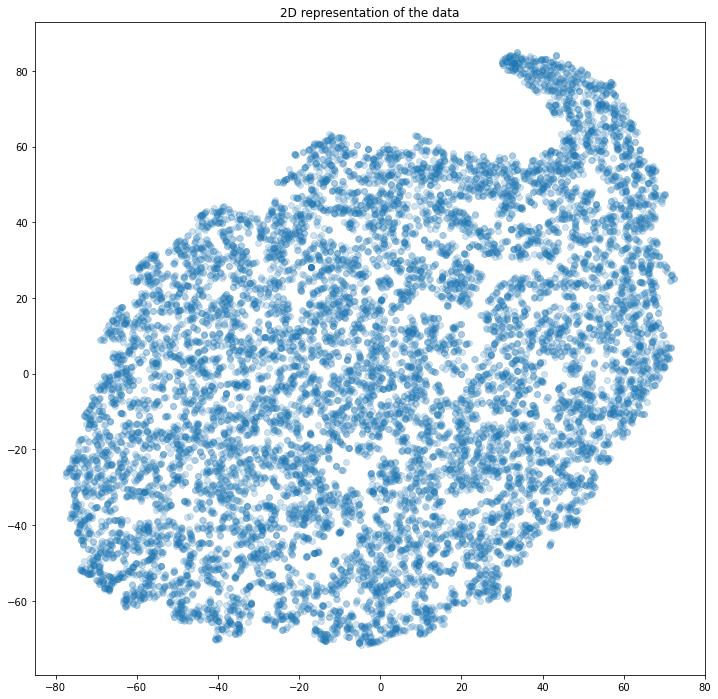

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x_bc_2d = tsne.fit_transform(x_scaled)

plt.figure(figsize=(12,12))
plt.title('2D representation of the data')
plt.scatter(x_bc_2d[:,0],x_bc_2d[:,1],alpha = 0.2)
plt.show()

By the TSNE plot above we see with our own eyes that clustering isn't trivial in this case

# Conclusions
It is very difficult to declare that one method is the best, or the x clusters make more sense than y clusters. But K-Means with 10 clusters does indeed look like a good place to start.<br>
However, Silhoute score is just mathematical tool for evaluation, we may want to evaluate by try and predict those clusters given the location of each gene on the chromosome. This gets it's own report, link here (no yet)

### References
This notebook was insipred by the code in this [link](https://www.kaggle.com/saptarsi/kmedoid-sg)<br>
scikit-learn-extra library can be found [here](https://github.com/scikit-learn-contrib/scikit-learn-extra)


The following code is for saving or loading all the variables created in this session so we can reuse them after a kernel restart and avoiding long computations. However, the file that stores the variable can't be uploaded to Github because it contains the genetic dataset which I have not gotten permission to publish as for now.

In [23]:
#pip install dill
#save
import dill
#dill.dump_session('C:\\Users\\Oren1\\variable_env.db')
#recover
dill.load_session('C:\\Users\\Oren1\\variable_env.db')